In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
#QUESTION 1
df = pd.read_csv('NYC_Restaurants.csv', dtype=str)
df.iloc[0]
df['RESTAURANT'] = df['DBA']+ ' ' + df['BUILDING']+ ' ' + df['STREET']+ ' ' + df['ZIPCODE']+ ' ' + df['BORO'] 
df['RESTAURANT'].head(10)

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

In [16]:
##QUESTION 3
mask=df[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts()>1
restaurants= df[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts()
chains=restaurants[mask]
len(chains)

368

<AxesSubplot:>

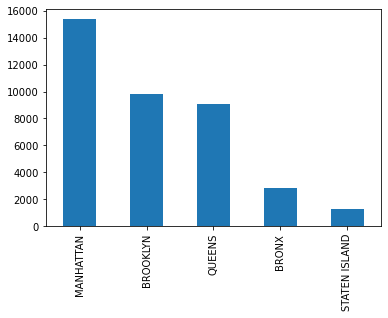

In [17]:
##QUESTION 6  
mask_nonchain=df[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts()==1
non_chain=restaurants[mask_nonchain]

mask_boro= (df['BORO']=='Missing')
df.loc[mask_boro,'BORO']=np.nan

boro_nonchains=df[df['DBA'].isin(non_chain.keys())]['BORO'].value_counts()

boro_nonchains.plot(kind="bar")

<AxesSubplot:>

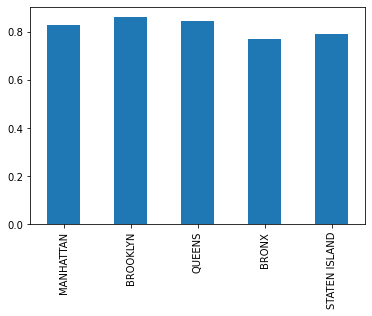

In [46]:
## QUESTION 7
chain_restaurants = df[['DBA','RESTAURANT']].dropna(how='any').drop_duplicates()['DBA'].value_counts()>=2
chain_restaurants[chain_restaurants].index.values
def restaurant_check(string):
    if string in chain_restaurants[chain_restaurants].index.values:
        return True
    else:
        return False

unique_restaurants_df = df.drop_duplicates(subset=['RESTAURANT'])
mask = unique_restaurants_df['DBA'].map(restaurant_check)
non_chains=unique_restaurants_df[~mask]['BORO'].dropna(how='any').value_counts()
total_restaurants=unique_restaurants_df['BORO'].dropna(how='any').value_counts()

fraction_non_chain=non_chains/total_restaurants
fraction_non_chain.plot(kind='bar')


In [38]:
##QUESTION 14
def get_type(street):
    return street.split()[-1]
df['STREET TYPE'] = df['STREET'].apply(get_type)

def get_base(street):
    return ' '.join(street.split()[:-1])
df['STREET BASE'] = df['STREET'].apply(get_base)

df['STREET BASE & ZIP'] = df['STREET BASE'].astype(str) + ' ' + df['ZIPCODE'].astype(str)

merged = df.merge(df, left_on = 'STREET BASE & ZIP', right_on = 'STREET BASE & ZIP', suffixes = ['-1', '-2'])

merged = merged[['STREET BASE & ZIP', 'STREET TYPE-2', 'STREET TYPE-1']].drop_duplicates()


mask = merged['STREET TYPE-2'] != merged['STREET TYPE-1']
street_types = merged[mask][['STREET TYPE-2', 'STREET TYPE-1']]

table = pd.crosstab(index = street_types['STREET TYPE-2'], columns = street_types['STREET TYPE-1'])

table[['AVE', 'ST', 'PL', 'RD', 'BOULEARD', 'BULEVARD']].idxmax()

STREET TYPE-1
AVE         AVENUE
ST          STREET
PL           PLACE
RD            ROAD
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object

In [36]:
#QUESTION 11
all_violations= pd.Categorical(df['VIOLATION DESCRIPTION'])
boro=pd.Categorical(df['BORO'])
boro_violations=pd.crosstab(all_violations, boro)
boro_violations

col_0,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
row_0,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12,40,49,29,5
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1,5,6,4,1
''''Wash hands sign not posted at hand wash facility.,21,57,93,60,8
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5,12,19,24,3
Accurate thermometer not provided in refrigerated or hot holding equipment.,21,76,98,92,16
...,...,...,...,...,...
Toilet facility not provided for employees or for patrons when required.,2,3,11,3,1
Toilet facility used by women does not have at least one covered garbage receptacle.,1,5,7,2,1
"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",2,8,15,20,3


In [37]:
#Question 11 contd.
boro_violations.idxmax()

col_0
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object